In [111]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score
import statsmodels.api as sm
#from causalinference import CausalModel

In [133]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [58]:
m1_dir = '/Users/tsebaotshewarega/Documents/Third year/Fall 2023/QTM 385/eCommerce/eCommerce_class/ecomm_performance_data/milestone-1/ecomm_rev_2020.csv'
m2_dir = '/Users/tsebaotshewarega/Documents/Third year/Fall 2023/QTM 385/eCommerce/eCommerce_class/ecomm_performance_data/milestone-2/ecomm_rev_2020_incl_assn.csv'
m3_dir = '/Users/tsebaotshewarega/Documents/Third year/Fall 2023/QTM 385/eCommerce/eCommerce_class/ecomm_performance_data/milestone-3/ecomm_rev_2020_omnipotent.csv'

m1_df = pd.read_csv(m1_dir)
m2_df = pd.read_csv(m2_dir)
m3_df = pd.read_csv(m3_dir)


# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(m1_df[['ESTIMATED_INCOME_DECILE']])

# Convert the result to a DataFrame for better visualization
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['ESTIMATED_INCOME_DECILE']))

# Concatenate the one-hot-encoded DataFrame with the original DataFrame
m1_df = pd.concat([m1_df, one_hot_df], axis=1)
m2_df = pd.concat([m2_df, one_hot_df], axis=1)
m3_df = pd.concat([m3_df, one_hot_df], axis=1)

## Milestone 3 

You discover a strange new file on the computer which includes two new variables:
* CART_TOTAL_Y0 – what the customer would have spent had they had not been given the ad
* CART_TOTAL_Y1 – what the customer would have spent had been given the ad

Tasks: 
1. Compute the individual effect of the advertisement for each customer. What is this effect, and how does it differ from the effect we estimated earlier?
2. Take the mean of the individual effects. How does the mean compare to the estimate you generated using ASSIGNED_DISPLAY_AD? Are they significantly different? Why, or why not?
3. Generate a non-random assignment rule based on the other available covariates that gives you the largest possible effect size. Consider what the implications are of this rule if, just for example, Google or Facebook were to employ a rule based on the customer’s income level, to report their advertising ROIs to the client through their ad-buying platform.


In [117]:
m3_df

,CUSTID,CART_TOTAL,PREVIOUS_CHECKOUTS,PAGE_VIEWS,ESTIMATED_INCOME_DECILE,PRODUCT_VIEWS,ASSIGNED_DISPLAY_AD,ATTRIB_DISPLAY_AD,CART_TOTAL_Y0,CART_TOTAL_Y1,ESTIMATED_INCOME_DECILE_1,ESTIMATED_INCOME_DECILE_2,ESTIMATED_INCOME_DECILE_3,ESTIMATED_INCOME_DECILE_4,ESTIMATED_INCOME_DECILE_5,ESTIMATED_INCOME_DECILE_6,ESTIMATED_INCOME_DECILE_7,ESTIMATED_INCOME_DECILE_8,ESTIMATED_INCOME_DECILE_9,ESTIMATED_INCOME_DECILE_10
0,3218c960b1144725db928e476eddf136,17.00,0,5,1,9,1,0,17.00,6.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,342ce76c22408d0e9cdf13afa6934be8,9.64,0,7,4,9,0,0,9.64,10.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,625ebd9228821291d23c6e2a7cf7f05e,39.57,3,4,5,10,1,0,39.57,30.75,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1941f3295dae57c0b5deeedfb0cedb0c,35.95,5,9,9,10,1,0,35.95,28.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,dd50c9de777380b997e1769d61c9829e,42.23,0,4,7,10,0,0,42.23,42.79,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,eb00d664738ac99c9c1e65f124effcb0,39.55,0,7,1,11,1,0,39.55,30.31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2871,1f0b2a538fb209e8111f4724aeb59c43,59.93,0,4,1,10,1,1,70.97,59.93,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2872,bdd43dd162d0b5788fd30c43cb042df4,52.99,0,3,10,12,1,1,63.90,52.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2873,73895496a872752af0e5eadbbca5d554,75.99,7,5,5,10,0,0,75.99,75.75,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='PAGE_VIEWS', ylabel='CART_TOTAL'>

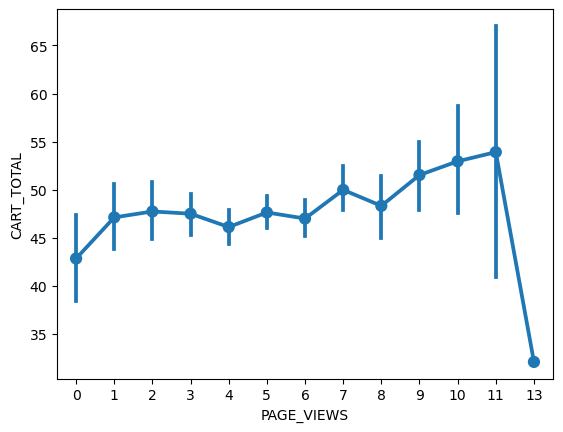

In [119]:
sns.pointplot(data = m3_df, x = 'PAGE_VIEWS', y = 'CART_TOTAL')

<AxesSubplot:xlabel='PRODUCT_VIEWS', ylabel='CART_TOTAL'>

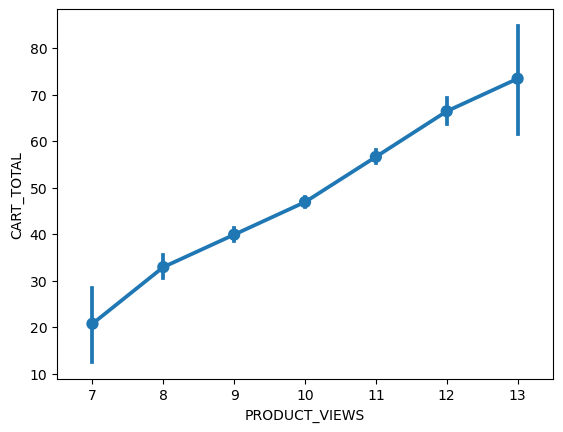

In [120]:
sns.pointplot(data = m3_df, x = 'PRODUCT_VIEWS', y = 'CART_TOTAL')

<AxesSubplot:xlabel='PREVIOUS_CHECKOUTS', ylabel='CART_TOTAL'>

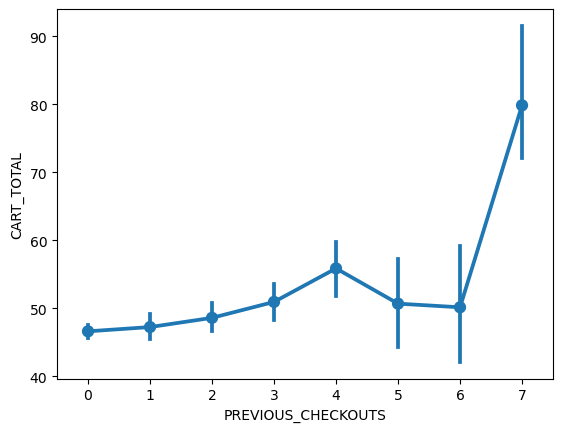

In [121]:
sns.pointplot(data = m3_df, x = 'PREVIOUS_CHECKOUTS', y = 'CART_TOTAL')

<AxesSubplot:xlabel='ESTIMATED_INCOME_DECILE', ylabel='CART_TOTAL_Y1'>

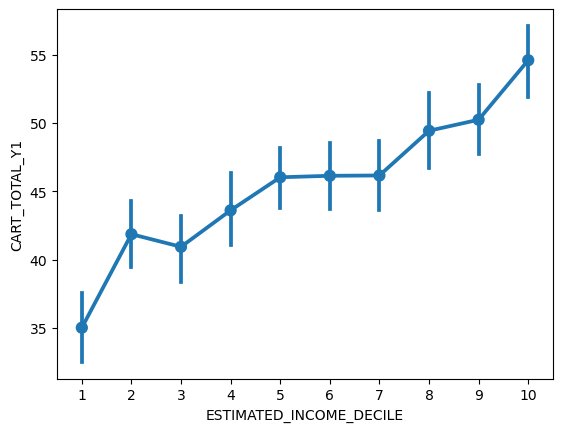

In [122]:
sns.pointplot(data = m3_df, x = 'ESTIMATED_INCOME_DECILE', y = 'CART_TOTAL_Y1')

In [127]:
# creating a separate dataset just for 1st income decile 
x_1 = m3_df.loc[m3_df['ESTIMATED_INCOME_DECILE'] == 1]
print(x_1['Y1-Y0'].mean())
print(x_1['CART_TOTAL_Y0'].mean())

-4.662604166666664
39.67406249999997


In [128]:
# creating a separate dataset just for 10th income decile 
x_10 = m3_df.loc[m3_df['ESTIMATED_INCOME_DECILE'] == 10]
print(x_10['Y1-Y0'].mean())
print(x_10['CART_TOTAL_Y0'].mean())

-5.051463414634146
59.65986062717769


In [123]:
m3_df['Y1-Y0'] = m3_df['CART_TOTAL_Y1'] - m3_df['CART_TOTAL_Y0']
m3_df['Y1-Y0'].mean()

-4.898855652173917

In [135]:
m3_df['POS_CART_TOTAL'] = (m3_df['Y1-Y0'] > 0).astype(int)
pos = m3_df.loc[m3_df['POS_CART_TOTAL'] == 1]
neg = m3_df.loc[m3_df['POS_CART_TOTAL'] == 0]

# x_10_less = m3_df.loc[m3_df['ESTIMATED_INCOME_DECILE'] == 10]
# x_10_more = m3_df.loc[m3_df['ESTIMATED_INCOME_DECILE'] == 1]

In [129]:
x_1['ASSN'] = x_1.shape[0] * [0]
x_10['ASSN'] = x_10.shape[0] * [1]
x_1['OBS'] = x_1['CART_TOTAL_Y0']
x_10['OBS'] = x_10['CART_TOTAL_Y1']

/var/folders/23/9qxt9xf137b9vvfgjdfj88ym0000gn/T/ipykernel_43000/2868226843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_1['ASSN'] = x_1.shape[0] * [0]
/var/folders/23/9qxt9xf137b9vvfgjdfj88ym0000gn/T/ipykernel_43000/2868226843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_10['ASSN'] = x_10.shape[0] * [1]
/var/folders/23/9qxt9xf137b9vvfgjdfj88ym0000gn/T/ipykernel_43000/2868226843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [130]:
x_10

,CUSTID,CART_TOTAL,PREVIOUS_CHECKOUTS,PAGE_VIEWS,ESTIMATED_INCOME_DECILE,PRODUCT_VIEWS,ASSIGNED_DISPLAY_AD,ATTRIB_DISPLAY_AD,CART_TOTAL_Y0,CART_TOTAL_Y1,...,ESTIMATED_INCOME_DECILE_4,ESTIMATED_INCOME_DECILE_5,ESTIMATED_INCOME_DECILE_6,ESTIMATED_INCOME_DECILE_7,ESTIMATED_INCOME_DECILE_8,ESTIMATED_INCOME_DECILE_9,ESTIMATED_INCOME_DECILE_10,Y1-Y0,ASSN,OBS
10,b9984ba3c04181ef24e6134ff4a13035,48.14,2,1,10,10,1,1,56.87,48.14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-8.73,1,48.14
14,01a40e60f561d39da926e1260536e49b,71.59,0,2,10,11,1,1,81.85,71.59,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-10.26,1,71.59
29,3d36fb55278f0a97798fdccd17885f8b,57.99,0,3,10,10,0,0,57.99,59.70,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.71,1,59.70
30,f15f38f5da7db7a93eb482a91c2c1e2e,32.08,0,4,10,11,1,0,32.08,23.03,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-9.05,1,23.03
44,ce733680fdfc7adf14877f184017e15d,69.97,3,5,10,11,0,0,69.97,70.95,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.98,1,70.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,6ff95033d993edb02c95dce860501d43,18.76,0,3,10,9,1,0,18.76,10.46,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-8.30,1,10.46
2861,e57497199cc060c7d3552bc47e3f10ee,73.99,0,9,10,9,0,0,73.99,73.42,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.57,1,73.42
2865,d371b8c9eb0650c1d0e43174ee55a133,48.71,0,6,10,11,0,0,48.71,48.07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.64,1,48.07
2866,3bedd226687cfa05037b83084c977998,51.21,0,7,10,9,0,0,51.21,51.90,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.69,1,51.90


In [131]:
#observing effect of our assignment metric
from sklearn.linear_model import LinearRegression
income_linreg = pd.concat([x_1, x_10], axis=0)
income_linreg_filtered = income_linreg.loc[:, ['ASSN','PREVIOUS_CHECKOUTS', 'PAGE_VIEWS', 'PRODUCT_VIEWS']]
y = income_linreg['OBS']
# Create and train a linear regression model
model = LinearRegression()
model.fit(income_linreg_filtered, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Display the coefficients and intercept
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [13.66127873  1.71405167  0.44274806  9.07459001]
Intercept: -54.214103491805666


In [132]:
income_linreg_filtered

,ASSN,PREVIOUS_CHECKOUTS,PAGE_VIEWS,PRODUCT_VIEWS
0,0,0,5,9
8,0,6,9,10
11,0,0,3,10
16,0,0,3,10
20,0,0,5,9
...,...,...,...,...
2860,1,0,3,9
2861,1,0,9,9
2865,1,0,6,11
2866,1,0,7,9


In [ ]:
def scale(x):
    return round((x - m3_df['Y1-Y0'].mean())/m3_df['Y1-Y0'].std())
m3_df['RESID_INT'] = m3_df['Y1-Y0'].apply(scale)

In [136]:
#### Trying Binary Classifier First
X = m3_df.loc[:, ['PREVIOUS_CHECKOUTS', 'PAGE_VIEWS',
                         'PRODUCT_VIEWS','ESTIMATED_INCOME_DECILE_1', 'ESTIMATED_INCOME_DECILE_2',
                         'ESTIMATED_INCOME_DECILE_3', 'ESTIMATED_INCOME_DECILE_4','ESTIMATED_INCOME_DECILE_5',
                         'ESTIMATED_INCOME_DECILE_6','ESTIMATED_INCOME_DECILE_7', 'ESTIMATED_INCOME_DECILE_8',
                         'ESTIMATED_INCOME_DECILE_9', 'ESTIMATED_INCOME_DECILE_10']]
y = m3_df['POS_CART_TOTAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f'Gradient Boosting Accuracy: {gb_accuracy:.2f}')

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f'XGBoost Accuracy: {xgb_accuracy:.2f}')

Logistic Regression Accuracy: 0.77
Random Forest Accuracy: 0.70
SVM Accuracy: 0.77
Gradient Boosting Accuracy: 0.76
XGBoost Accuracy: 0.73


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Feature Engineering
m3_df['Y1-Y0'] = m3_df['CART_TOTAL_Y1'] - m3_df['CART_TOTAL_Y0']
m3_df['POS_CART_TOTAL'] = (m3_df['Y1-Y0'] > 0).astype(int)

# Feature Selection
# X = m3_df.loc[:, ['PREVIOUS_CHECKOUTS', 'PAGE_VIEWS', 'PRODUCT_VIEWS',
#                   'ESTIMATED_INCOME_DECILE_1', 'ESTIMATED_INCOME_DECILE_2', 
#                   'ESTIMATED_INCOME_DECILE_3', 'ESTIMATED_INCOME_DECILE_4', 
#                   'ESTIMATED_INCOME_DECILE_5', 'ESTIMATED_INCOME_DECILE_6', 
#                   'ESTIMATED_INCOME_DECILE_7', 'ESTIMATED_INCOME_DECILE_8', 
#                   'ESTIMATED_INCOME_DECILE_9', 'ESTIMATED_INCOME_DECILE_10']]
X = m3_df.loc[:, ['PREVIOUS_CHECKOUTS', 'PAGE_VIEWS', 'PRODUCT_VIEWS',
                  'ESTIMATED_INCOME_DECILE']]
y = m3_df['POS_CART_TOTAL']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.77


In [143]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

                   Feature  Coefficient
2            PRODUCT_VIEWS     0.102878
1               PAGE_VIEWS     0.000927
3  ESTIMATED_INCOME_DECILE     0.000786
0       PREVIOUS_CHECKOUTS    -0.049784


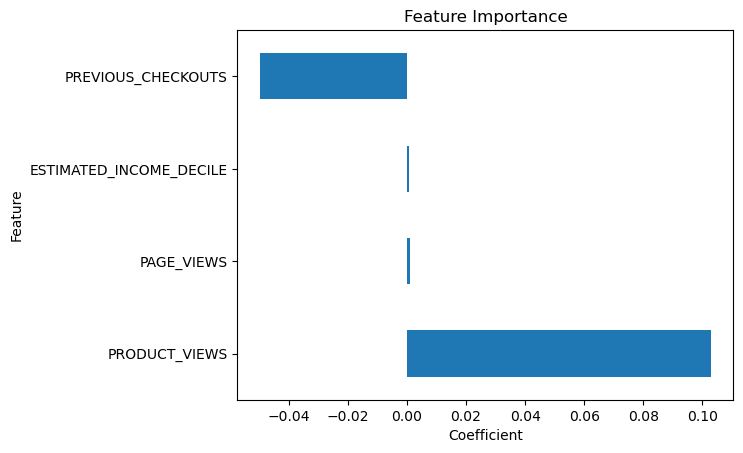

In [145]:
import matplotlib.pyplot as plt

# Plot feature importance
feature_importance.plot(kind='barh', x='Feature', y='Coefficient', legend=False)
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [ ]:
combined_pred = xgb_pred + gb_pred + svm_pred
combined_pred = np.round(combined_pred/3)
combined_acc = accuracy_score(y_test, combined_pred)
print(f'Combined Accuracy: {combined_acc:.2f}')

In [ ]:
precision = precision_score(y_test, combined_pred, average='binary')  # For binary classification
recall = recall_score(y_test, combined_pred, average='binary')  # For binary classification
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

In [ ]:
X_test['PRED'] = y_test
m3_df_feats = m3_df.loc[:, ['Y1-Y0','POS_CART_TOTAL','ASSIGNED_DISPLAY_AD','ATTRIB_DISPLAY_AD','CART_TOTAL',
                            'CART_TOTAL_Y0', 'CART_TOTAL_Y1']]
X_test_merged = X_test.merge(m3_df_feats, left_index=True, right_index=True )
X_test_pos = X_test_merged.loc[X_test_merged['PRED'] == 1]
X_test_neg = X_test_merged.loc[X_test_merged['PRED'] == 0]

In [ ]:
# Assuming X_test_pos and X_test_neg are your DataFrames
# Replace X_test_pos and X_test_neg with your actual DataFrames

# Use .loc to avoid SettingWithCopyWarning
X_test_pos.loc[:, 'OBSERVED_CART'] = X_test_pos['CART_TOTAL_Y1']
X_test_neg.loc[:, 'OBSERVED_CART'] = X_test_neg['CART_TOTAL_Y0']


In [ ]:
X_test_final = pd.concat([X_test_pos, X_test_neg], axis = 0)

In [ ]:
X_test_pos['OBSERVED_CART'].mean()

In [ ]:
X_test_neg['OBSERVED_CART'].mean()

In [ ]:
# We want to maximize both Y1 - Y0 & difference between the two treatment groups
m3_df['CART_TOTAL_Y1'].describe()

In [ ]:
m3_df['TOP_SPENDER_Y0'] = (50.170000 < m3_df['CART_TOTAL_Y0']).astype(int)
m3_df['TOP_SPENDER_Y1'] = (45.150000 < m3_df['CART_TOTAL_Y1']).astype(int)

In [ ]:
#### Predicting TOP_SPENDER
X = m3_df.loc[:, ['PREVIOUS_CHECKOUTS',
                         'PRODUCT_VIEWS','ESTIMATED_INCOME_DECILE_1', 'ESTIMATED_INCOME_DECILE_2',
                         'ESTIMATED_INCOME_DECILE_3', 'ESTIMATED_INCOME_DECILE_4','ESTIMATED_INCOME_DECILE_5',
                         'ESTIMATED_INCOME_DECILE_6','ESTIMATED_INCOME_DECILE_7', 'ESTIMATED_INCOME_DECILE_8',
                         'ESTIMATED_INCOME_DECILE_9', 'ESTIMATED_INCOME_DECILE_10']]
y = m3_df['TOP_SPENDER_Y1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f'Gradient Boosting Accuracy: {gb_accuracy:.2f}')

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f'XGBoost Accuracy: {xgb_accuracy:.2f}')

In [ ]:
count_greater = sum(x > y for x, y in zip(linear_pred, y_test))
count_less = sum(x < y for x, y in zip(linear_pred, y_test))
print(f"Count of elements in list1 greater than list2: {count_greater}")
print(f"Count of elements in list2 greater than list1: {count_less}")

In [ ]:
count_resid = sum(x - y for x, y in zip(linear_pred, y_test))
count_resid

In [ ]:
X_test['PRED'] = y_test
m3_df_feats = m3_df.loc[:, ['Y1-Y0','POS_CART_TOTAL','ASSIGNED_DISPLAY_AD','ATTRIB_DISPLAY_AD','CART_TOTAL',
                            'CART_TOTAL_Y0', 'CART_TOTAL_Y1']]
X_train_merged = X_train.merge(m3_df_feats, left_index=True, right_index=True )
X_test_merged = X_test.merge(m3_df_feats, left_index=True, right_index=True )
test_sorted_merged = X_test_merged.sort_index()
test_sorted = X_test.sort_index()
m3_df_feats = m3_df_feats.sort_index()

In [ ]:
X_test_merged['TOP_SPENDER_PRED'] = (X_train_merged['CART_TOTAL'].mean() < X_test_merged['PRED']).astype(int)

In [ ]:
X_test_pos = X_test_merged.loc[X_test_merged['PRED'] == 1]
X_test_neg = X_test_merged.loc[X_test_merged['PRED'] == 0]
X_test_pos['OBSERVED_CART'] = X_test_pos['CART_TOTAL_Y1']
X_test_neg['OBSERVED_CART'] = X_test_neg['CART_TOTAL_Y0']

In [ ]:
X_test_pos = X_test_merged.loc[X_test_merged['TOP_SPENDER_PRED'] == 1]
X_test_neg = X_test_merged.loc[X_test_merged['TOP_SPENDER_PRED'] == 0]
X_test_pos['OBSERVED_CART'] = X_test_pos['CART_TOTAL_Y1']
X_test_neg['OBSERVED_CART'] = X_test_neg['CART_TOTAL_Y0']

In [ ]:
#observing effect of our assignment metric
from sklearn.linear_model import LinearRegression

X_test_LinReg = pd.concat([X_test_pos, X_test_neg], axis = 0)
X_test_LinReg_filtered = X_test_LinReg.loc[:, ['TOP_SPENDER_PRED','PREVIOUS_CHECKOUTS', 'PAGE_VIEWS', 'PRODUCT_VIEWS',
                                      'ESTIMATED_INCOME_DECILE_1', 'ESTIMATED_INCOME_DECILE_2',
                                      'ESTIMATED_INCOME_DECILE_3', 'ESTIMATED_INCOME_DECILE_4',
                                      'ESTIMATED_INCOME_DECILE_5', 'ESTIMATED_INCOME_DECILE_6',
                                      'ESTIMATED_INCOME_DECILE_7', 'ESTIMATED_INCOME_DECILE_8',
                                      'ESTIMATED_INCOME_DECILE_9', 'ESTIMATED_INCOME_DECILE_10']]
y = X_test_LinReg['OBSERVED_CART']
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_test_LinReg_filtered, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Display the coefficients and intercept
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

In [ ]:
x_10 = m3_df.loc[m3_df['ESTIMATED_INCOME_DECILE'] == 10]

X = x_10.loc[:, ['PREVIOUS_CHECKOUTS', 'PAGE_VIEWS',
                         'PRODUCT_VIEWS']]
y = m3_df['CART_TOTAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print(f'Linear Regression Mean Squared Error: {linear_mse:.2f}')

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
print(f'Decision Tree Mean Squared Error: {tree_mse:.2f}')

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
print(f'Random Forest Mean Squared Error: {forest_mse:.2f}')

# Support Vector Regression (SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_pred)
print(f'SVR Mean Squared Error: {svr_mse:.2f}')

# XGBoost Regression
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
print(f'XGBoost Mean Squared Error: {xgb_mse:.2f}')

In [ ]:
#### Trying Multiclass Classifier
X = m3_df.loc[:, ['CART_TOTAL', 'PREVIOUS_CHECKOUTS', 'PAGE_VIEWS','ESTIMATED_INCOME_DECILE',
                         'PRODUCT_VIEWS','ESTIMATED_INCOME_DECILE_1', 'ESTIMATED_INCOME_DECILE_2',
                         'ESTIMATED_INCOME_DECILE_3', 'ESTIMATED_INCOME_DECILE_4','ESTIMATED_INCOME_DECILE_5',
                         'ESTIMATED_INCOME_DECILE_6','ESTIMATED_INCOME_DECILE_7', 'ESTIMATED_INCOME_DECILE_8',
                         'ESTIMATED_INCOME_DECILE_9', 'ESTIMATED_INCOME_DECILE_10']]
y = m3_df['RESID_INT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f'Gradient Boosting Accuracy: {gb_accuracy:.2f}')


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

m3_df_obs = m3_df.loc[:, ['CART_TOTAL', 'PREVIOUS_CHECKOUTS', 'PAGE_VIEWS',
                          'ESTIMATED_INCOME_DECILE', 'PRODUCT_VIEWS']]
# Specify the number of clusters (k)
k_list = [2,3,4,5]

labels_list = []

for k in k_list :
    # Create a KMeans instance
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model to the data
    kmeans.fit(m3_df_obs)

    # Get cluster assignments for each data point
    labels = kmeans.labels_
    m3_df[f'k_{k}'] = labels

In [ ]:
sc = accuracy_score(m3_df['POS_CART_TOTAL'], m3_df['k_2'])
sc

In [ ]:
m3_df['pos_k3'] = (m3_df['Y1-Y0'] > 0).astype(int)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the numeric columns
m3_df_standardized = StandardScaler().fit_transform(m3_df_obs)

# Step 2: Perform PCA
pca = PCA()
pca_result = pca.fit_transform(m3_df_standardized)

# Step 3: Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, m3_df_standardized.shape[1] + 1)])

# Step 4: Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, m3_df_standardized.shape[1] + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


In [ ]:
# Step 5: Plot the 2D projection (scatter plot) for the first two principal components
pca_df['POS_CART_TOTAL'] = m3_df['POS_CART_TOTAL']
plt.figure(figsize=(8, 6))
sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', hue = 'POS_CART_TOTAL')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Data onto the First Two Principal Components')
plt.show()